<center> <h1>Application of the simple shooting method</h1> </center>
<center> <h2>Réalisation : Habibi Issam - Sajid Badr</h2> </center>

* Author: Olivier Cots
* Date: March 2021

------

## The energy min 2D integrator problem with friction and transversality conditions

Consider the following optimal control problem (Lagrange cost, fixed final time):

$$ 
    \left\{ 
    \begin{array}{l}
        \displaystyle J(u)  := \displaystyle \frac{1}{2} \int_0^{1} u^2(t) \, \mathrm{d}t \longrightarrow \min \\[1.0em]
        \dot{x}(t) = (x_2(t), -\mu x_2^2(t) + u(t)), \quad  u(t) \in \mathrm{R}, \quad t \in [0, 1] \text{ a.e.},    \\[1.0em]
        x(0) = (-1, 0), \quad c(x(1)) = 0.
    \end{array}
    \right. 
$$

We will consider two cases:

$$
a)~ c(x) = x - (1, 0), \quad b)~ c(x) = x_1 - 1.
$$

We consider the normal case ($p^0 = -1$), so the pseudo-Hamiltonian of the problem is

$$
    H(x,p,u) = p_1 x_2 + p_2 (-\mu x_2^2 + u) - \frac{1}{2} u^2.
$$

We denote by $t_0$, $t_f$ and $x_0$ the initial time, final time and initial condition.


<div class="alert alert-warning">

**Goal**

Solve the cases a) and b) of this optimal control problem by simple shooting with the nutopy package.
    
</div>

**_Remark._** 
* See this [page](https://ct.gitlabpages.inria.fr/gallery/shooting_tutorials/simple_shooting_general.html) for a general presentation of the simple shooting method with the use of nutopy package. 
* See this [page](https://ct.gitlabpages.inria.fr/gallery/smooth_case/smooth_case.html) for a more detailed use of nutopy package on a smooth example. 
* See this [page](https://ct.gitlabpages.inria.fr/nutopy/) for the documention of nutopy package.

## Preliminaries

In [2]:
# import packages
import nutopy as nt
import nutopy.tools as tools
import nutopy.ocp as ocp
import numpy as np
import matplotlib.pyplot as plt
#plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 150

In [3]:
# parameters
t0          = 0.0                    # initial time
tf          = 1.0                    # final time
x0          = np.array([-1.0, 0.0])  # initial condition
xf_target_a = np.array([1.0, 0.0])   # final target for the case a
xf_target_b = np.array([1.0])        # final target for the case b
mu          = 0.5                    # parameter mu

## Questions

<div class="alert alert-info">

**_Question 1:_**
    
Write the maximizing control in feeback form $u[p]$.
      
</div>

**Answer 1:** To complete here (double-click on the line to complete)

$$
u[p] = p_2
$$

<div class="alert alert-info">

**_Question 2:_**
    
Complete the code of `ufun` coding the control in feedback form.
      
</div>

In [4]:
# ----------------------------
# Answer 2 to complete here
# ----------------------------
#
# Control in feedback form: used for plotting
#
@tools.vectorize(vvars=(1,))
def ufun(p):
    u = p[1]
    return u

<div class="alert alert-info">

**_Question 3:_**
    
Write the maximized Hamiltonian and the adjoint equation.
    
</div>

**Answer 3:** 
The maximized Hamiltonian holds the following expression :
$$
H(x,p,u[p]) = p_1x_2 - \mu p_2{x_2}^2 + \frac{1}{2}p_2^{2}
$$
The adjoint equations are
$$
\dot{p}=-\nabla_x{H(x,p,u)}=(0,-p_1+2\mu p_2x_2) \\
\dot{x}=\nabla_p{H(x,p,u)}=(x_2,p_2-\mu{x_2}^2)
$$

<div class="alert alert-info">

**_Question 4:_**
    
Complete the code of `hfun` and `dhfun` coding the maximized Hamiltonian and its derivative.
      
</div>

**_Remark._** Let us denote by $h(t, x, p) = H(x, p, u[p])$ the maximized Hamiltonian. The function `dhfun` codes:

$$
    \frac{\partial h}{\partial x}(t, x, p) \cdot \delta x + \frac{\partial h}{\partial p}(t, x, p) \cdot \delta p.
$$

The (normal and maximized) Hamiltonian is straightforwardly implemented in `hfun`. For further needs, we have to implement its first and second derivatives _wrt._ to state ($x$) and costate ($p$). This derivatives, evaluated against first and second order increments are implemented by `dhfun` and `d2hfun`, respectively.

La dérivée de H par rapport à x donne :
$$
(0,p_1-2\mu p_2x_2)
$$
La dérivée de H par rapport à p donne : 
$$
(x_2,p_2-\mu{x_2}^2)
$$
L'expression de dhfun est donc : 
$$
(p_1-2\mu p_2 x_2) \delta x_2 + x_2 \delta p_1 +(p_2-\mu {x_2}^2) \delta p_2
$$

In [5]:
# ----------------------------
# Answer 4 to complete here
# ----------------------------
#
# Maximized Hamiltonian with its derivative
#
def hfun(t, x, p):
    '''
        Hamiltonian: 
        
            h = hfun(t, x, p, mu)
    
        Inputs: 
        
            - t  : time, float
            - x  : state, array
            - p  : co-state, array
            - mu : friction parameter, float
            
        Outputs:
        
            - h  : Hamiltonian, float
        
    '''
    x2 = x[1]
    p1 = p[0]
    p2 = p[1]
    h = p1*x2 + p2*(-mu*(x2)**2 + (1/2)*p2)
    return h

def dhfun(t, x, dx, p, dp):
    '''
        Derivative of the Hamiltonian: 
        
            hd = dhfun(t, x, dx, p, dp, mu)
    
        Inputs: 
        
            - t  : time, float
            - x  : state, array
            - dx : state increment, array
            - p  : co-state, array
            - dp : co-state increment, array
            - mu : friction parameter, float
            
        Outputs:
        
            - hd : derivative of the Hamiltonian, float
        
    '''
    x2  = x[1]
    dx2 = dx[1]
    p1  = p[0]
    p2  = p[1]
    dp1 = dp[0]
    dp2 = dp[1]
    hd = (p1-2*mu*p2*x2)*dx2 \
         + x2*dp1 \
         + (p2-mu*(x2)**2)*dp2
    return hd

In [6]:
# The second order derivative of hfun and the definition of the flow
#
def d2hfun(t, x, dx, d2x, p, dp, d2p):
    # d2h = dh_xx dx d2x + dh_xp dp d2x + dh_px dx d2p + dh_pp dp d2p
    x2   = x[1]
    dx2  = dx[1]
    d2x2 = d2x[1]
    p1   = p[0]
    p2   = p[1]
    dp1  = dp[0]
    dp2  = dp[1]
    d2p1 = d2p[0]
    d2p2 = d2p[1]
    hdd  =    dp1*d2x2 \
            + d2p1*dx2 \
            - 2.0*mu*d2x2*dx2*p2 - 2.0*mu*x2*dx2*d2p2 \
            - 2.0*mu*x2*d2x2*dp2 \
            + d2p2*dp2
    return hdd

hfun = nt.tools.tensorize(dhfun, d2hfun, tvars=(2, 3))(hfun)

In [7]:
h    = ocp.Hamiltonian(hfun)   # The Hamiltonian object

To define in the following the shooting function, one must integrate the Hamiltonian system defined by `h`. This is done by defining a [Flow](https://ct.gitlabpages.inria.fr/nutopy/api/ocp.html#nutopy.ocp.Flow) object:

In [8]:
f    = ocp.Flow(h)             # The flow associated to the Hamiltonian object is 
                               # the exponential mapping with its derivative
                               # that can be used to define the Jacobian of the 
                               # shooting function

To compute the value of the Hamiltonan flow at time $t_f$ starting from time $t_0$ and initial conditions $(x_0,p_0)$, do the following:

In [9]:
p0 = np.array([0.1, 0.1])
xf, pf = f(t0, x0, p0, tf)
print(xf, pf)

[-0.96666508  0.05000781] [0.1        0.00127897]


### case a: $c(x) = x - x_f$

In this case, the shooting function is simply given by

$$
    S(p_0) = \pi_x(z(t_f, t_0, x_0, p_0)) - x_f,
$$

where $x_f = (1, 0)$ and $z(t_f, t_0, x_0, p_0)$ is the value of the Hamiltonan flow at time $t_f$ starting from time $t_0$ and initial conditions $(x_0,p_0)$. 

<div class="alert alert-info">

**_Question 5:_**
    
Complete the code of `shoot` coding the shooting function.
      
</div>

In [10]:
# ----------------------------
# Answer 5 to complete here
# ----------------------------
#
# Shooting function and its derivative
#
# Nota bene: use f, t0, x0, tf, xf_target_a
#

def shoot(p0):
    '''
        Shooting function
        
            s = S(p0)
            
        Inputs:
        
            p0 : initial co-state, array
            
        Outputs:
        
            s  : value of the shooting function, array
    '''
    xf, _ = f(t0, x0, p0, tf) 
    s = np.zeros([2]) ### TO COMPLETE
    s = xf-xf_target_a
    return s

The Jacobian of $S$ at $p_0$ against the vector $\delta p_0$ is given by:

$$
    S'(p_0) \cdot \delta p_0 = \pi_x \left(\frac{\partial z}{\partial p_0}(t_f, t_0, x_0, p_0) \cdot \delta p_0 \right) = 
    \frac{\partial x}{\partial p_0}(t_f, t_0, x_0, p_0) \cdot \delta p_0.
$$

In [11]:
# Jacobian of the shooting function against dp0
def dshoot(p0, dp0):
    (xf, dxf), _ = f(t0, x0, (p0, dp0), tf)
    ds = dxf
    return ds

# We tensorize the shooting function, otherwise, we would have to give the Jacobian 
# of S instead of the Jacobian against a vector, to the nle solver.
shoot = nt.tools.tensorize(dshoot)(shoot)

In [12]:
# Resolution of the shooting function
#
p0_guess = np.array([0.1, 0.1])
sol = nt.nle.solve(shoot, p0_guess, df=shoot); p0_sol = sol.x
print('p0_sol =', p0_sol, '\t shoot =', shoot(p0_sol))


     Calls  |f(x)|                 |x|
 
         1  1.967300768937284e+00  1.414213562373095e-01
         2  1.719731572785037e+00  1.798534093044436e+01
         3  1.410906422430211e+00  3.487107124079308e+01
         4  1.991207495319282e+00  3.937341638076422e+01
         5  7.277880985715982e-01  3.625515294040530e+01
         6  4.725619938021095e-01  3.555941926121004e+01
         7  3.166103150678147e-02  3.433969876028567e+01
         8  2.245063172754588e-03  3.442461252396225e+01
         9  6.943644107728013e-04  3.442864514091167e+01
        10  1.078577109865398e-04  3.442751328490402e+01
        11  2.201216767879966e-07  3.442730460220397e+01
        12  2.084484933152670e-09  3.442730418046803e+01
        13  1.938651563244826e-11  3.442730418446997e+01

 Results of the nle solver method:

 xsol    =  [31.89425568 12.96131661]
 f(xsol) =  [4.30899760e-12 1.89015747e-11]
 nfev    =  13
 njev    =  1
 status  =  1
 success =  True 

 Successfully completed: relative er

In [13]:
# Function to plot the solution
def plotSolution(p0):

    N      = 100
    tspan  = list(np.linspace(t0, tf, N+1))
    xf, pf = f(t0, x0, p0, tspan)
    u      = ufun(pf)

    fig = plt.figure()
    ax  = fig.add_subplot(711); ax.plot(tspan, xf); ax.set_xlabel('t'); ax.set_ylabel('$x$'); ax.axhline(0, color='k')
    ax  = fig.add_subplot(713); ax.plot(tspan, pf); ax.set_xlabel('t'); ax.set_ylabel('$p$'); ax.axhline(0, color='k')
    ax  = fig.add_subplot(715); ax.plot(tspan,  u); ax.set_xlabel('t'); ax.set_ylabel('$u$'); ax.axhline(0, color='k')
    
    x1  = np.zeros(N+1)
    x2  = np.zeros(N+1)
    for i in range(0, N+1):
        x1[i] = xf[i][0]
        x2[i] = xf[i][1]
    
    ax  = fig.add_subplot(717); ax.plot(x1,  x2); ax.set_xlabel('x1'); ax.set_ylabel('$x2$'); ax.axhline(0, color='k')

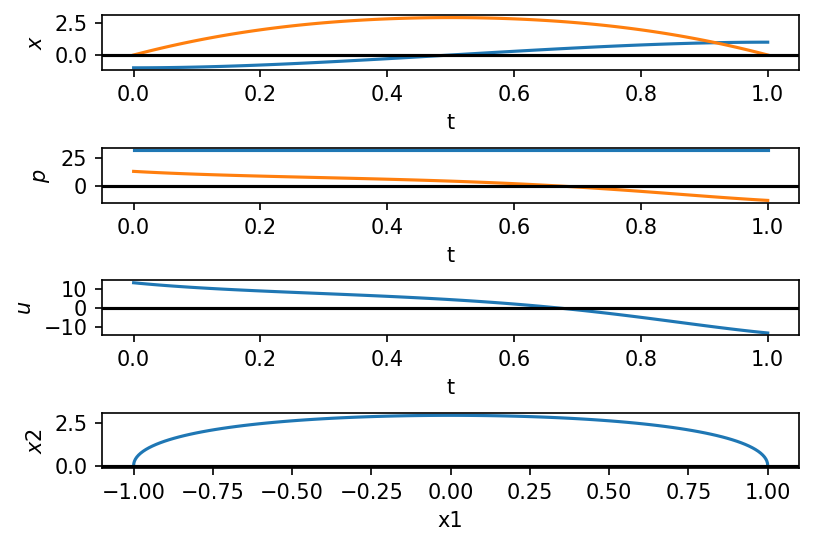

In [14]:
# Plot solution
plotSolution(p0_sol)

### case b: $c(x) = x_1 - 1$

<div class="alert alert-info">

**_Question 6:_**
    
Give the transversality condition.
      
</div>

**Answer 6:** The transversality condition : 
$$
p(t_f)=J_c^{T}(x(t_f))\lambda
p(t_f)=\lambda(1,0)=(\lambda,0)
$$


<div class="alert alert-info">

**_Question 7:_**
    
Write the shooting function.
      
</div>

**Answer 7:** The shooting function
$$
S(p_0, \lambda) = \left( (x_1(t_f, t_0, x_0, p_0) - 1, p_1(t_f, t_0, x_0, p_0) - \lambda, p_2(t_f, t_0, x_0, p_0) \right)
$$

<div class="alert alert-info">

**_Question 8:_**
    
Solve the shooting equations.
      
</div>

In [23]:
# ----------------------------
# Answer 8 to complete here
# ----------------------------
#
# Write the shooting function and its derivative
# Write the call to the nle solver
# Plot the solution
#
# Nota bene: use f, t0, x0, tf, xf_target_b
#
def shoot(z):
    '''
        Shooting function
        
            s = S(z)
            
        Inputs:
            
            z = (p0,lambda) : initial co-state, array
            
        Outputs:
        
            s  : value of the shooting function, array
    '''
    
    xf, pf = f(t0, x0, z[0:2], tf) 
    s = np.zeros([3])
    s[0] = xf[0]-xf_target_b
    s[1] = pf[0] - z[2]
    s[2] = pf[1]
    return s



In [30]:
# Jacobian of the shooting function against dp0
def dshoot(z, dz):
    (xf, dxf), (_, dpf) = f(t0, x0, (z[0:2], dz[0:2]), tf)
    ds = np.zeros([3]) ### TO COMPLETE
    ds[0] = dxf[0]
    ds[1] = dpf[0]
    ds[2] = dpf[1]
    return ds

# We tensorize the shooting function, otherwise, we would have to give the Jacobian 
# of S instead of the Jacobian against a vector, to the nle solver.
shoot = nt.tools.tensorize(dshoot)(shoot)

In [42]:
# Resolution of the shooting function
#
p0_guess = np.array([0.1, 0.1, 0.5])
sol = nt.nle.solve(shoot, p0_guess, df=shoot); p0_sol = sol.x[0:2]; lamda = sol.x[2] 
print('p0_sol =', p0_sol[0:2], '\t lambda =', lamda, '\nshoot =', shoot(sol.x))


     Calls  |f(x)|                 |x|
 
         1  2.006931281790379e+00  5.196152422706632e-01
         2  5.299154895030837e+01  5.282419186754634e+01
         3  3.139704141299368e+01  1.069474474247194e+01
         4  5.299154895030837e+01  5.282419186754634e+01
         5  3.139704141299368e+01  1.069474474247194e+01
         6  4.850957674889204e+01  4.951723895831173e+00
         7  1.651713255536263e+00  2.977851174088725e+00
         8  1.266805593127704e+01  8.103891512941413e+00
         9  1.277847271411896e+00  5.469160655615908e+00
        10  9.581745608845585e-01  1.053812298676173e+01
        11  1.097827624960532e+01  1.964646288683319e+01
        12  2.269361027724006e+00  1.554353512586661e+01
        13  3.172833447559625e+00  8.898834376202338e+00
        14  7.606081205707135e-01  1.107724842829286e+01
        15  6.873445223404017e-01  1.213272887668682e+01
        16  5.997414109244189e-01  1.438764936961430e+01
        17  9.234732267000783e-01  1.895972712

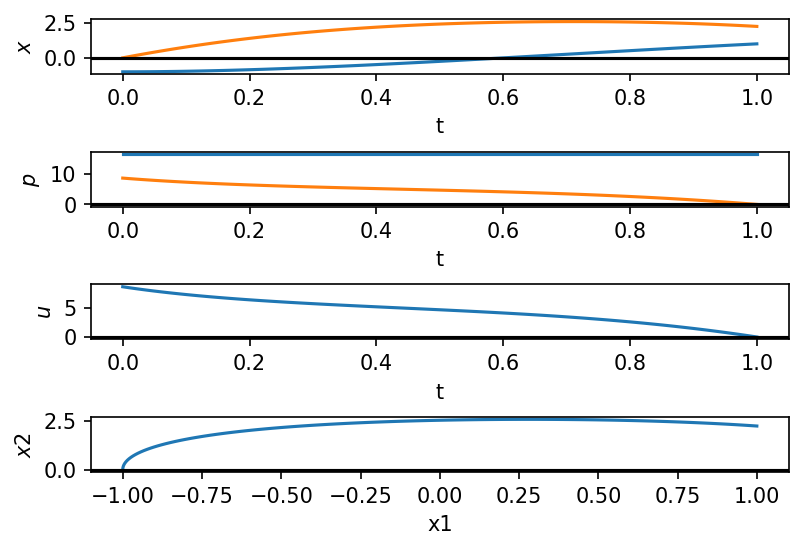

In [43]:
# Plot solution
plotSolution(p0_sol)